<a href="https://colab.research.google.com/github/AbdullahiOlapojoye/Parkinson-disease-progression-prediction/blob/main/Parkinsons_Progression_RNN_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fasteda
from fasteda import fast_eda

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf

In [ ]:
#Load data
train_proteins = pd.read_csv('train_proteins.csv')
train_peptides = pd.read_csv('train_peptides.csv')
train_clinical = pd.read_csv('train_clinical_data.csv')

In [ ]:
train_proteins.head()

In [ ]:
train_peptides.head()

In [ ]:
print(train_peptides.shape)

In [ ]:
train_clinical.head()

In [ ]:
print(train_clinical.shape)

**Merge all the data together**

In [ ]:
proteins_pepetides_df = pd.merge(train_proteins, train_peptides, on=['visit_id', 'visit_month', 'patient_id', 'UniProt'])

In [ ]:
merged_df = proteins_pepetides_df.merge(train_clinical, on=['visit_id', 'patient_id','visit_month'])

DataFrame Head:


,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.3,10.0,6.0,15.0,NaN,NaN
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.0,10.0,6.0,15.0,NaN,NaN
2,55_0,0,55,O00533,732430.0,IEIPSSVQQVPTIIK,174185.0,10.0,6.0,15.0,NaN,NaN


DataFrame Tail:


,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
941741,58648_108,108,58648,Q9Y646,21257.6,LALLVDTVGPR,21257.60,6.0,0.0,0.0,NaN,NaN
941742,58648_108,108,58648,Q9Y6R7,17953.1,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26,6.0,0.0,0.0,NaN,NaN
941743,58648_108,108,58648,Q9Y6R7,17953.1,GATTSPGVYELSSR,12825.90,6.0,0.0,0.0,NaN,NaN


----------------------------------------------------------------------------------------------------
Missing values:


,0
updrs_3,9120
updrs_4,446214
upd23b_clinical_state_on_medication,550019


----------------------------------------------------------------------------------------------------
MSNO Matrix:



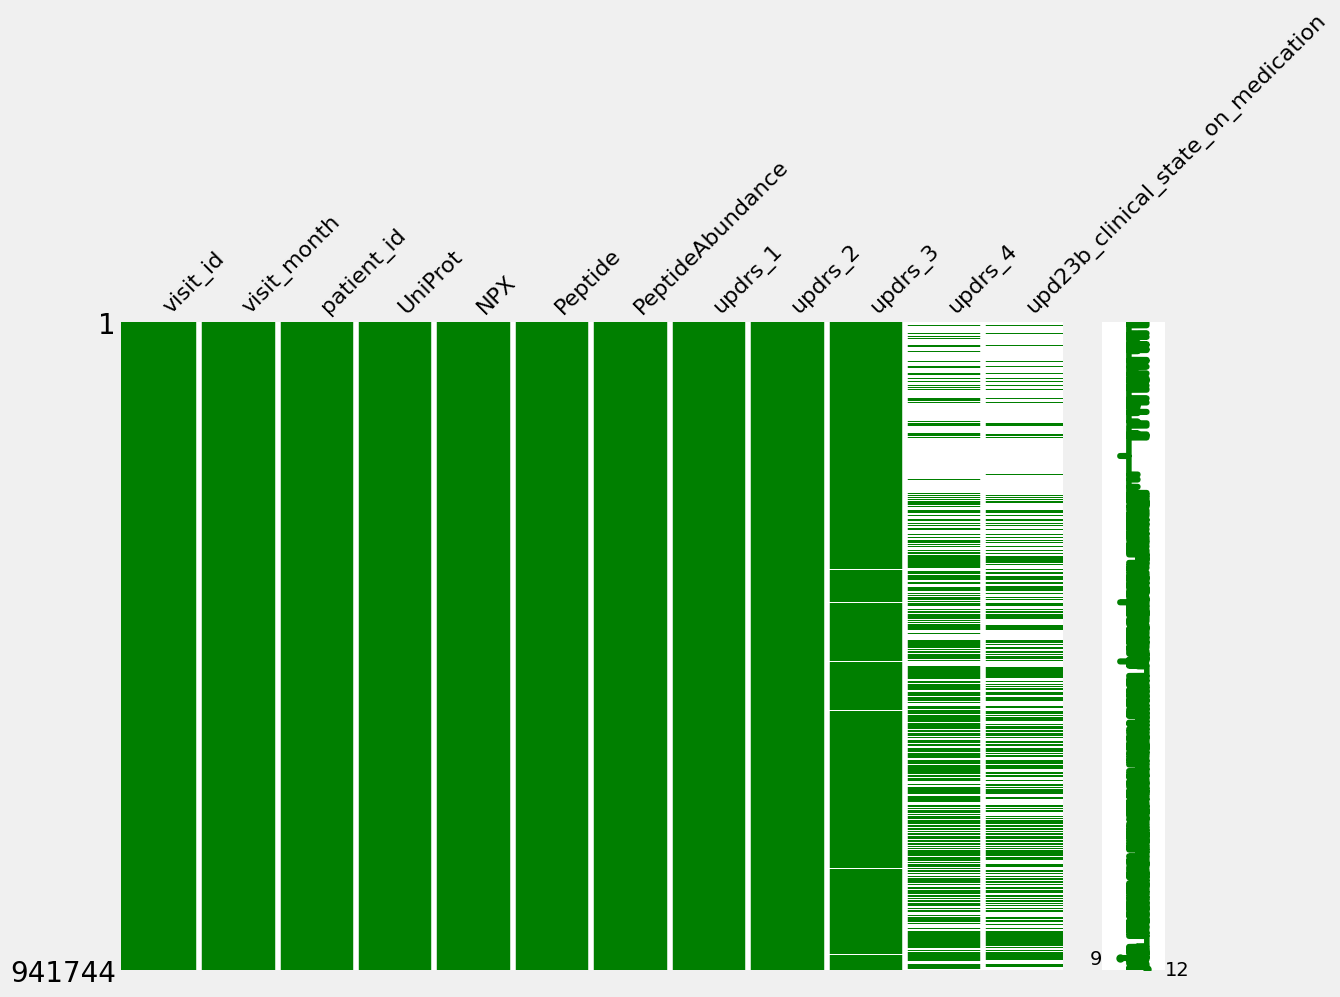

----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(941744, 12)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941744 entries, 0 to 941743
Data columns (total 12 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   visit_id                             941744 non-null  object 
 1   visit_month                          941744 non-null  int64  
 2   patient_id                           941744 non-null  int64  
 3   UniProt                              941744 non-null  object 
 4   NPX                                  941744 non-null  float64
 5   Peptide                              941744 non-null  object 
 6   PeptideAbundance                     941744 non-null  float64
 7   updrs_1                    

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
visit_month,941744,26.772,24,22.889,0,6,24,48,108,0.533594,-0.047734
patient_id,941744,32682.203,29313,18608.454,55,16574,29313,50611,65043,0.077892,-1.258342
NPX,941744,17009050.501,992818,63191693.656,84.608,243295,992818,3728860,613851000,4.757613,22.210291
PeptideAbundance,941744,643281.44,74359,3378417.669,10.998,28187.375,74359,221524,178752000,15.099632,323.487418
updrs_1,941744,6.506,5,5.311,0,2,5,9,33,0.827091,0.313995
updrs_2,941744,5.782,4,5.92,0,1,4,9,29,0.832651,0.399176
updrs_3,932624,17.205,16,15.021,0,2,16,28,78,0.393773,-0.109519
updrs_4,495530,1.888,0,3.048,0,0,0,3,20,1.929572,4.158693


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



/usr/local/lib/python3.10/dist-packages/fasteda/__init__.py:127: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "Spectral", linewidths = 2, linecolor = "#000000", fmt='.2f')


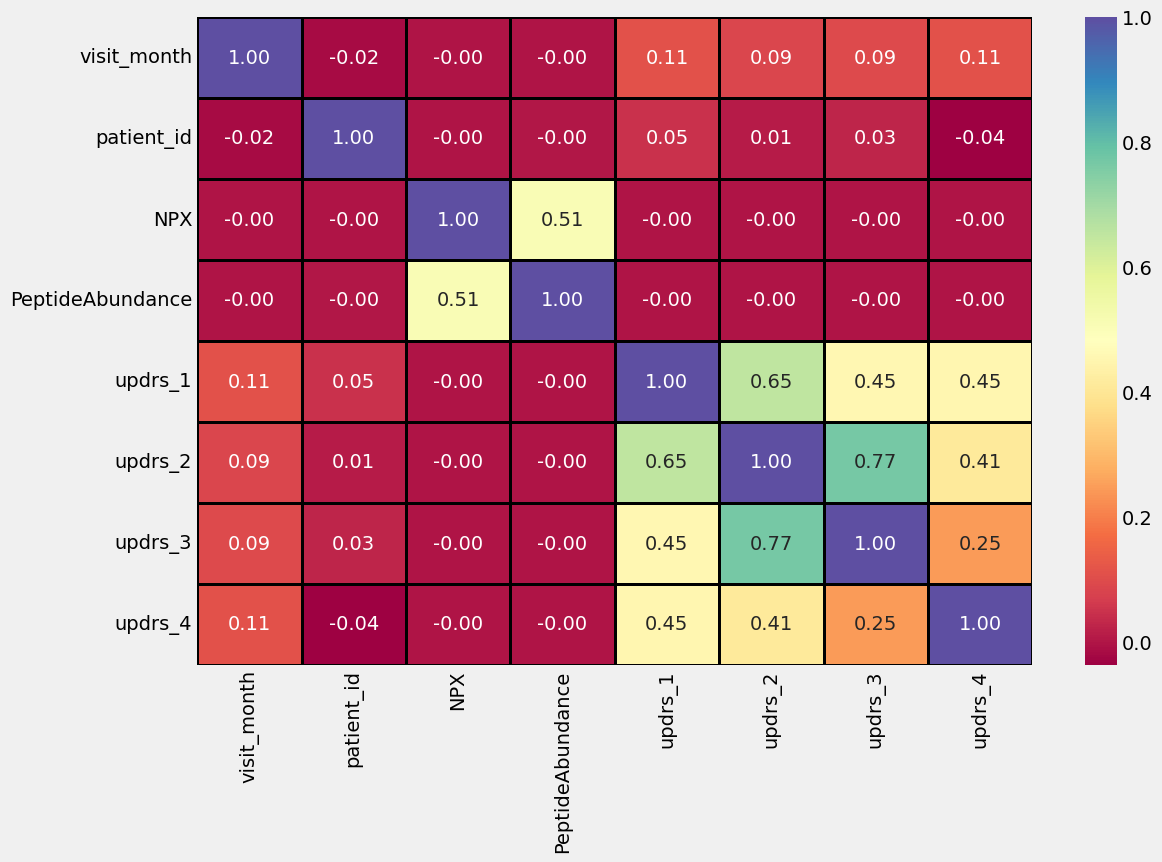

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



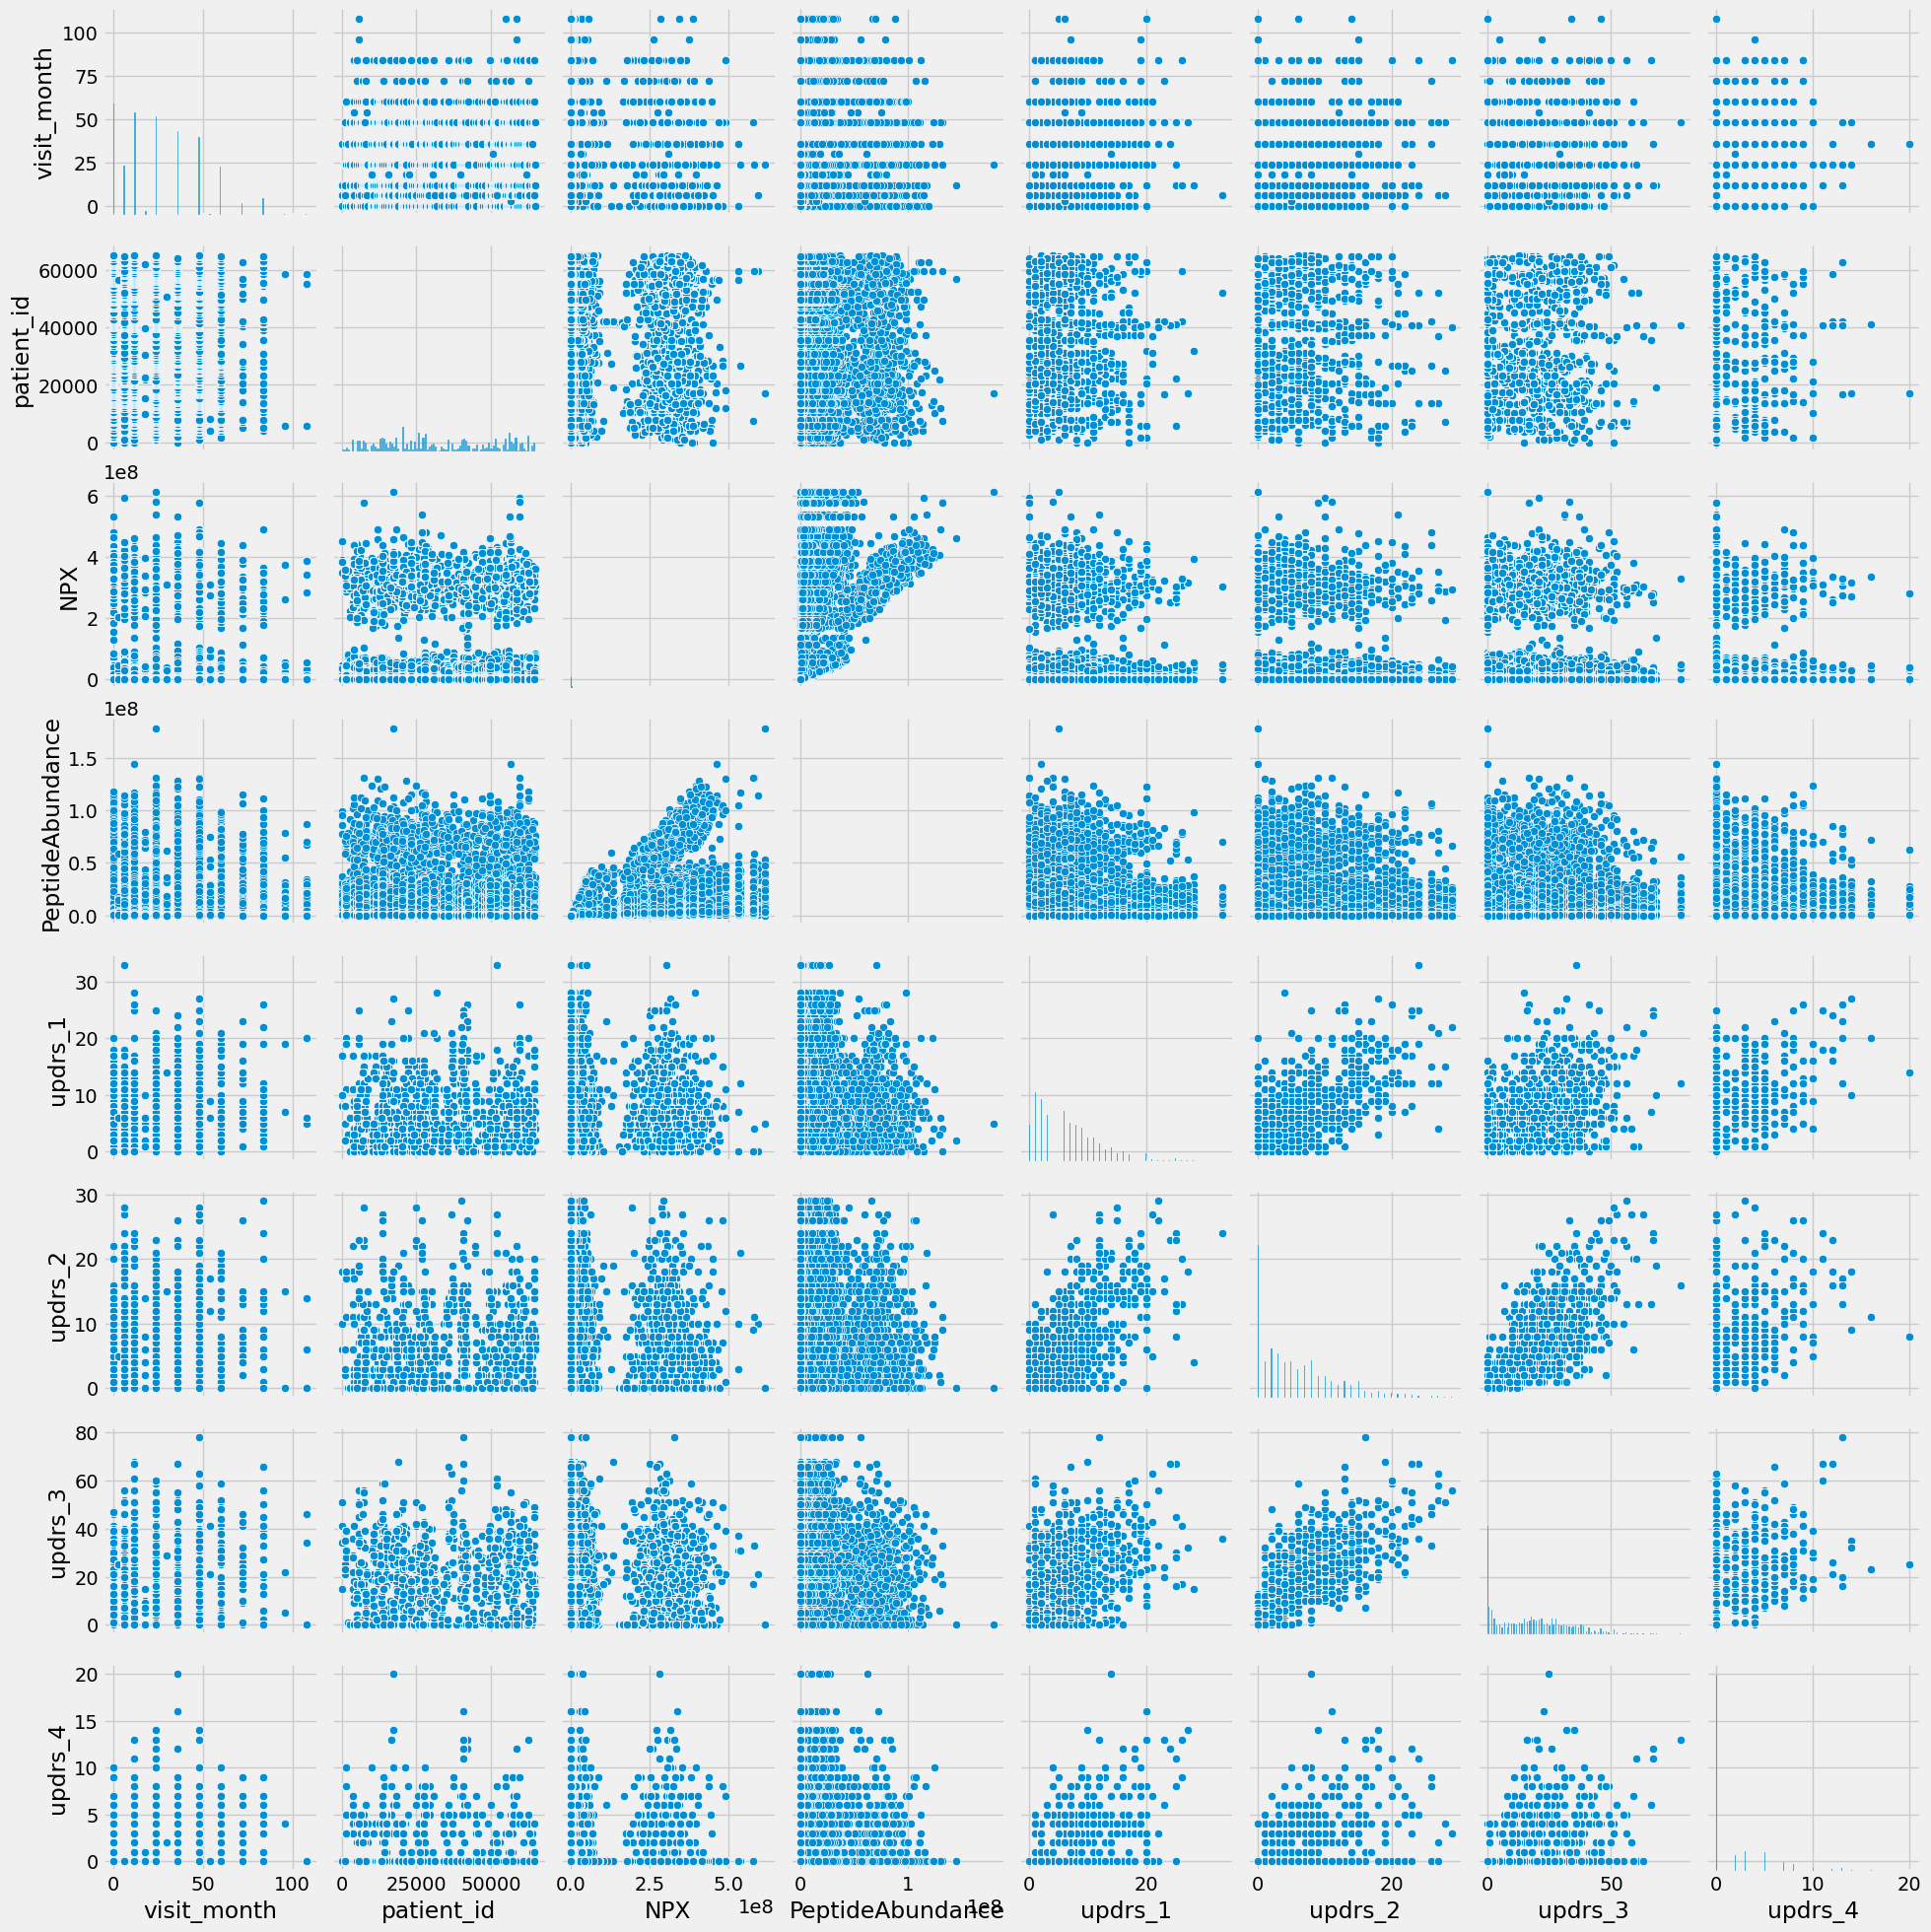

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



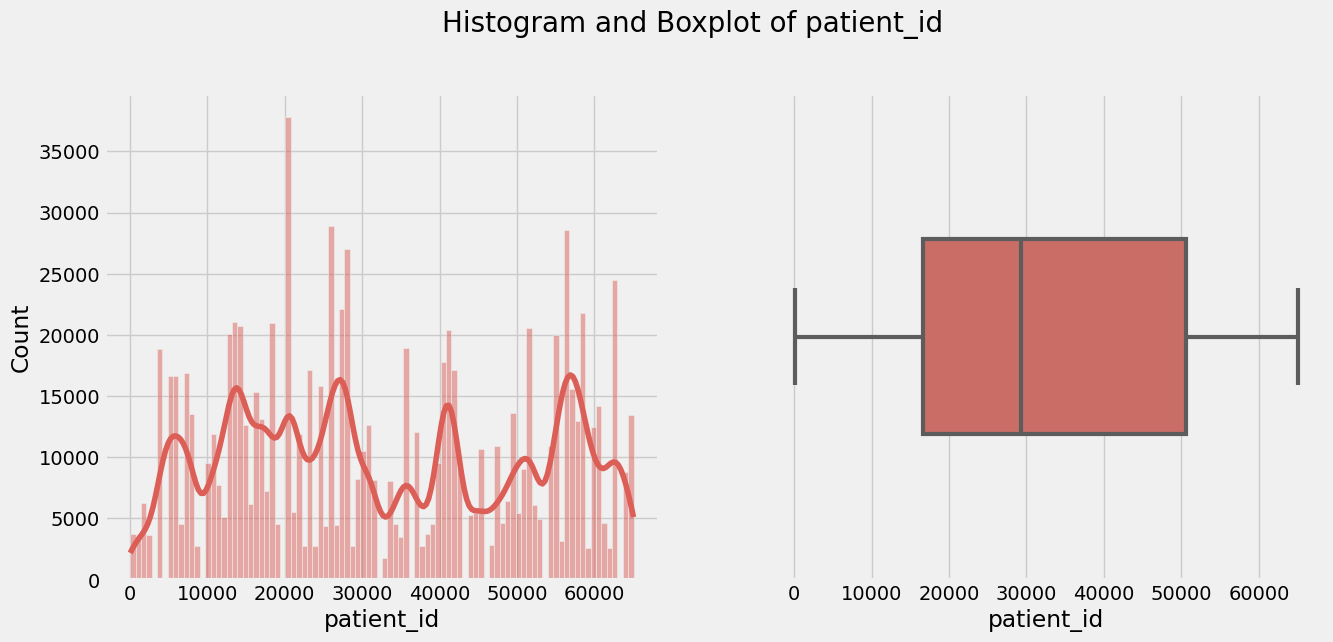

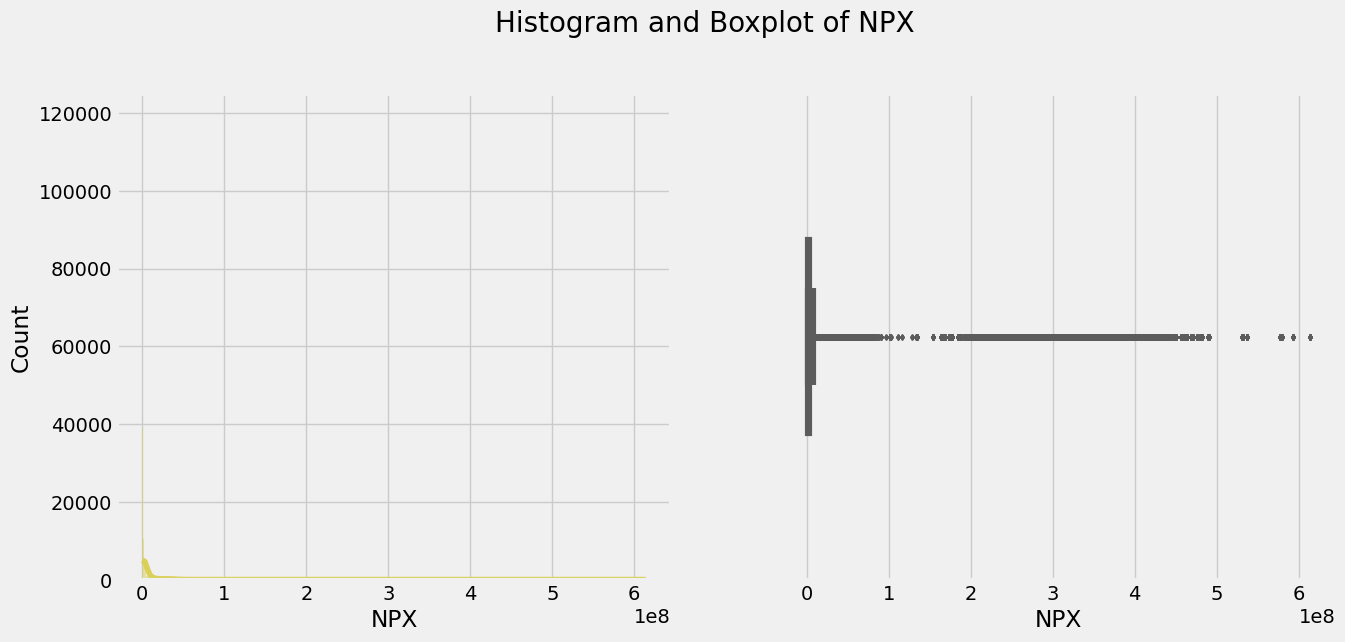

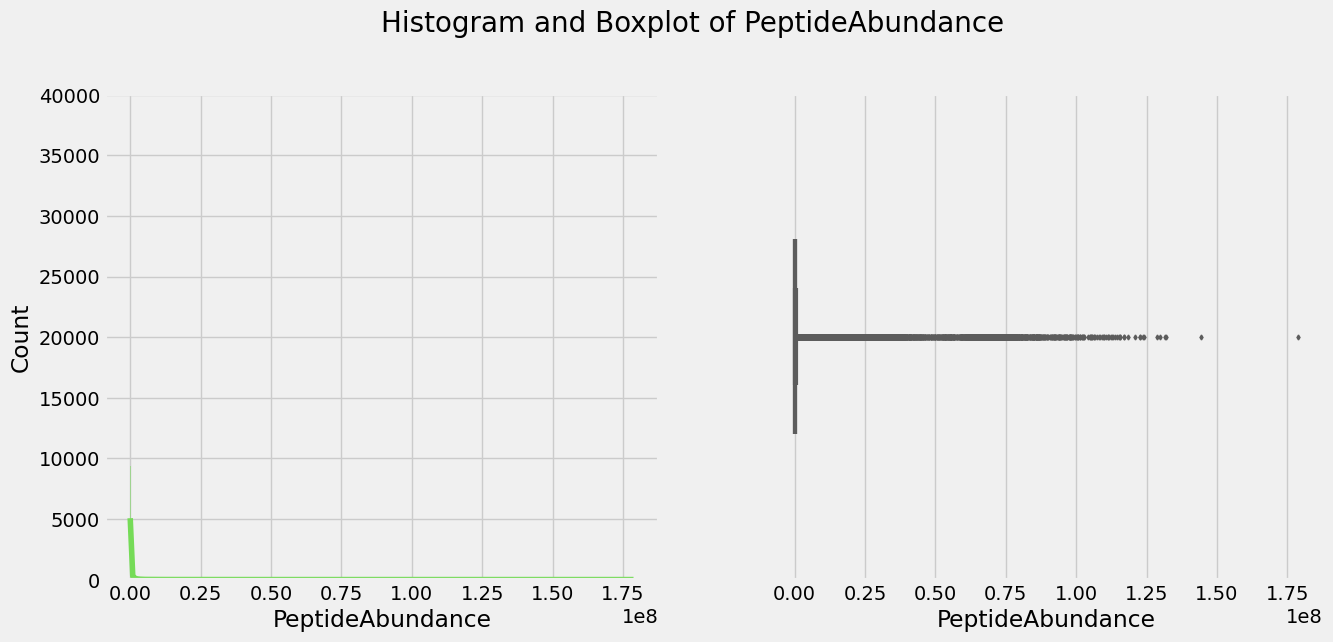

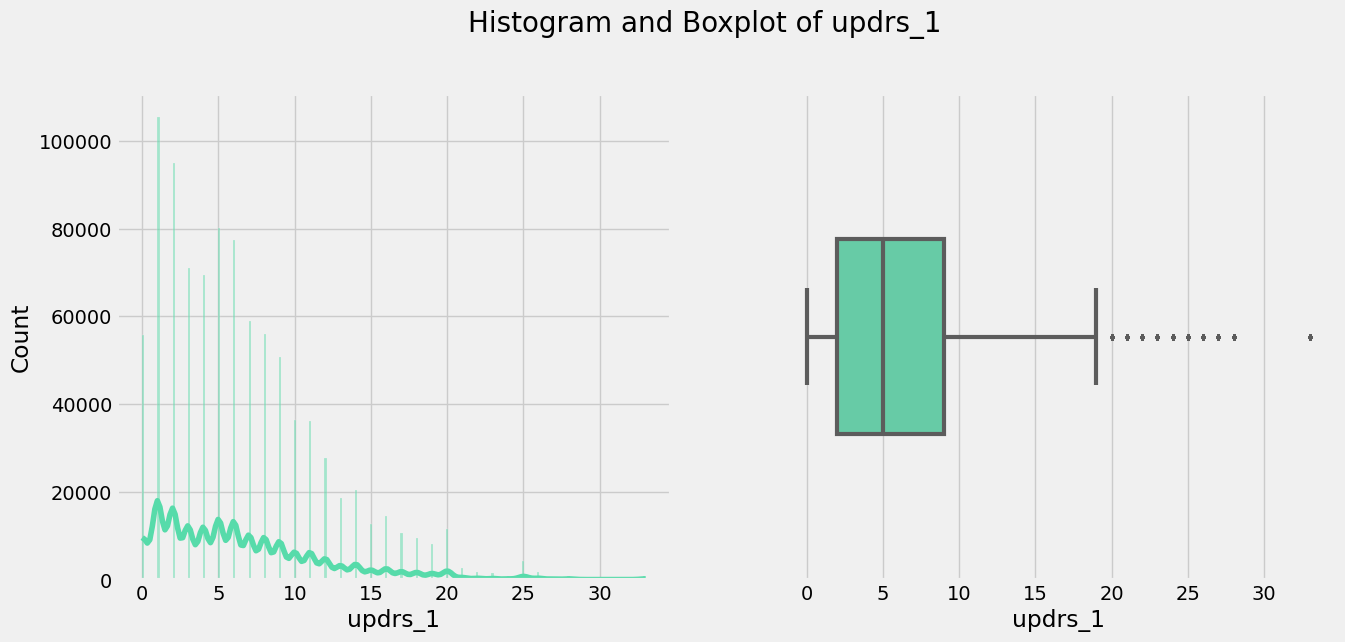

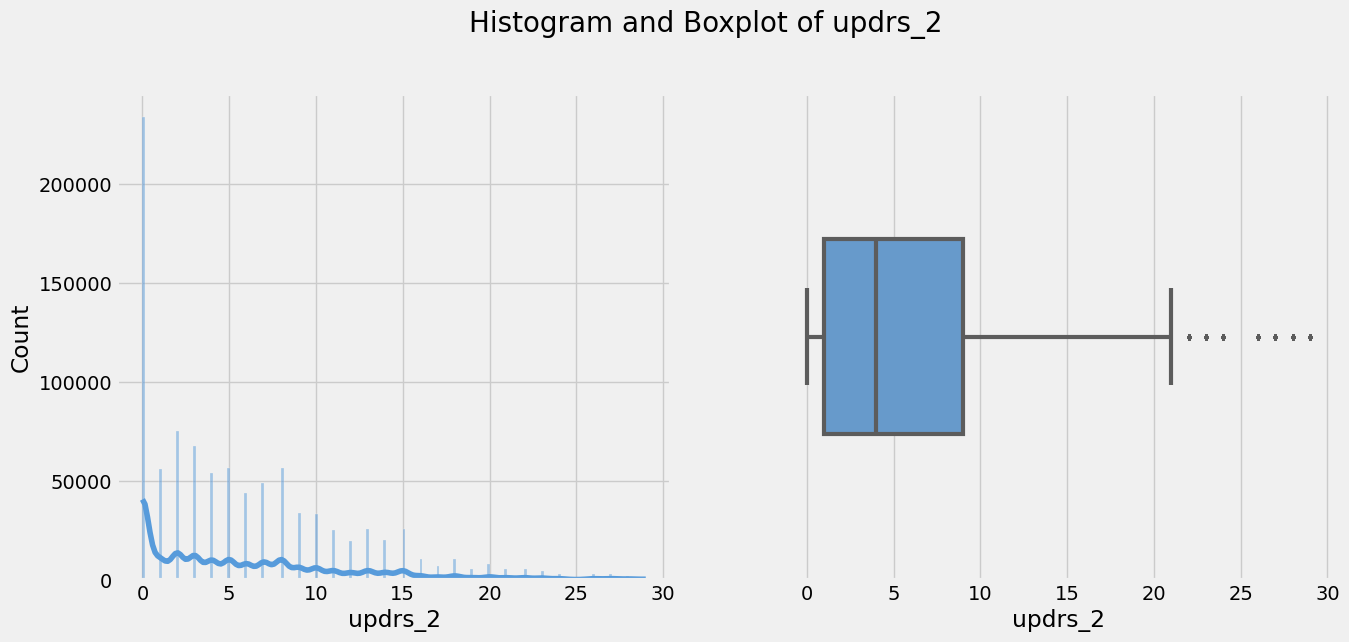

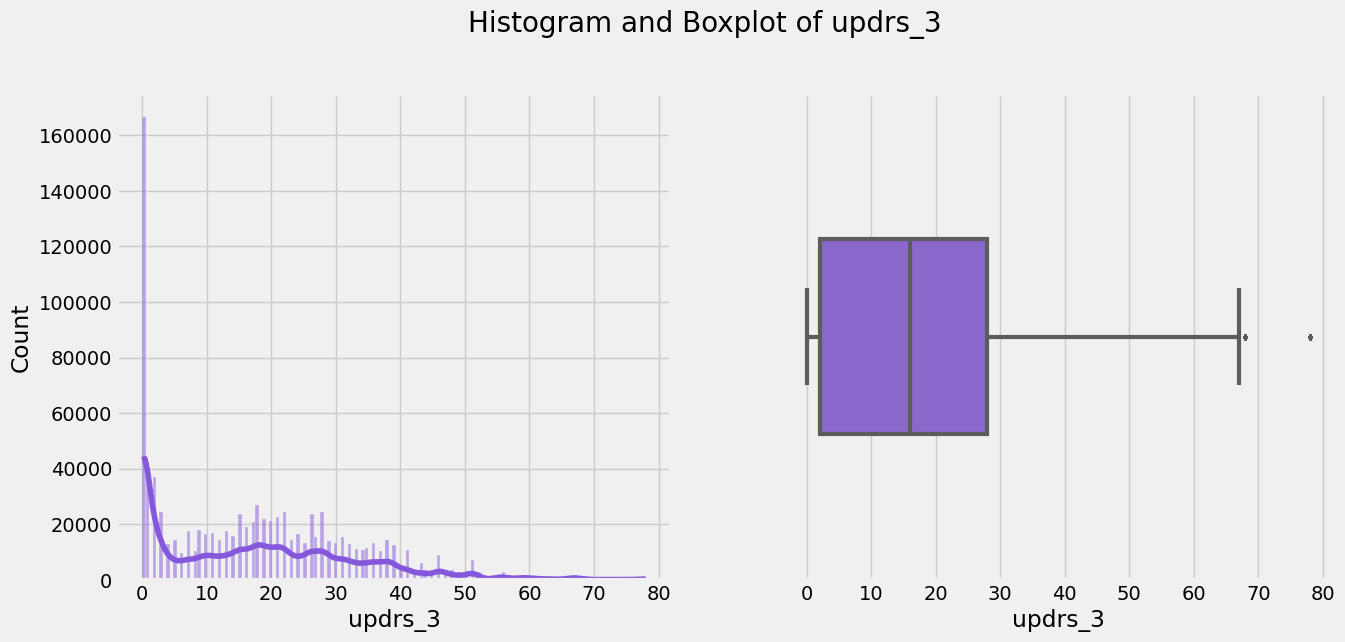

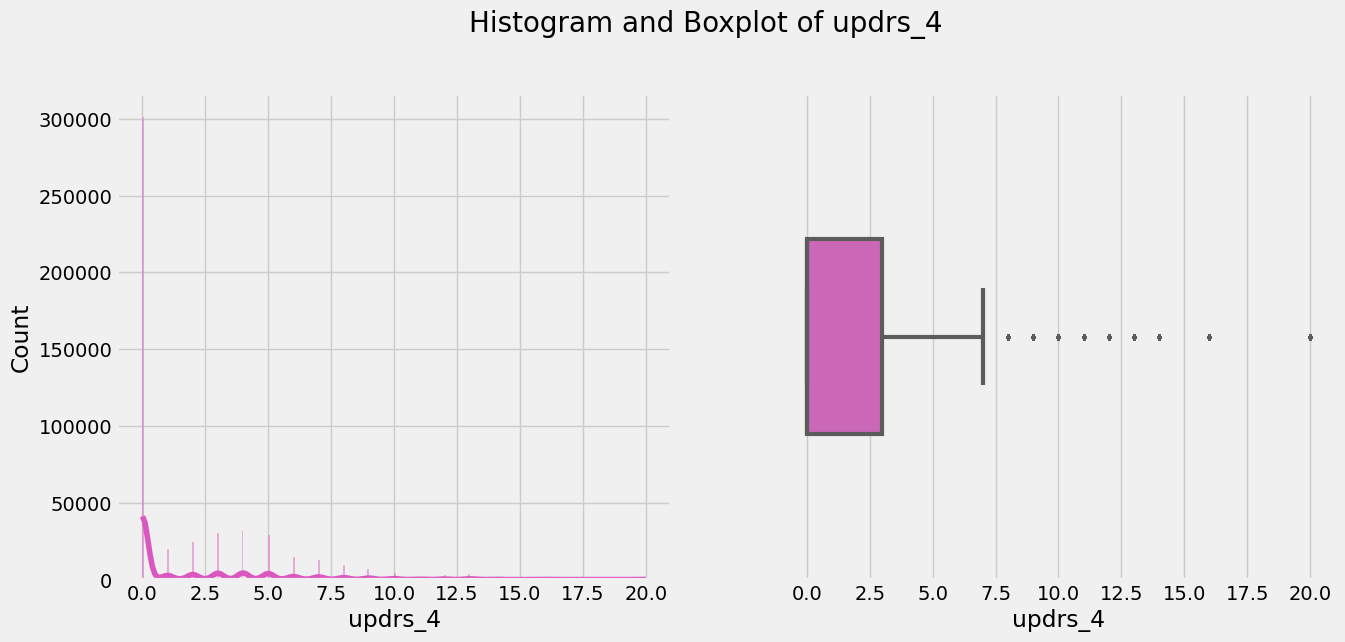

----------------------------------------------------------------------------------------------------
Countplot(s):



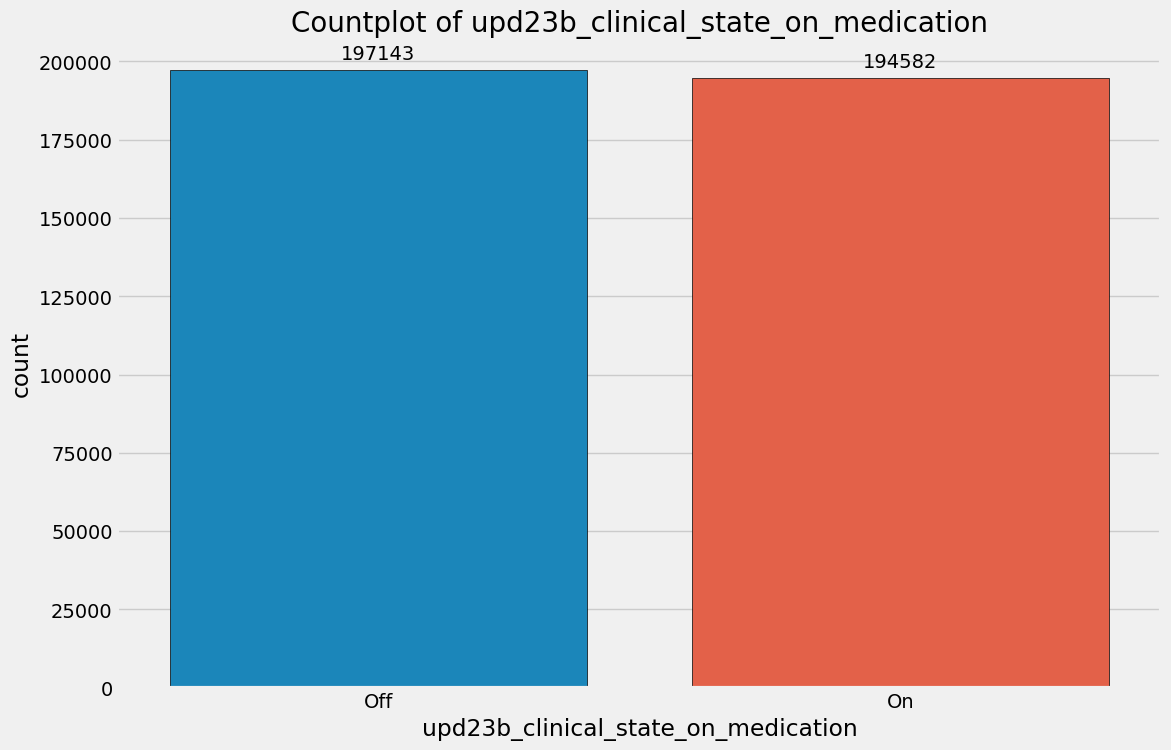

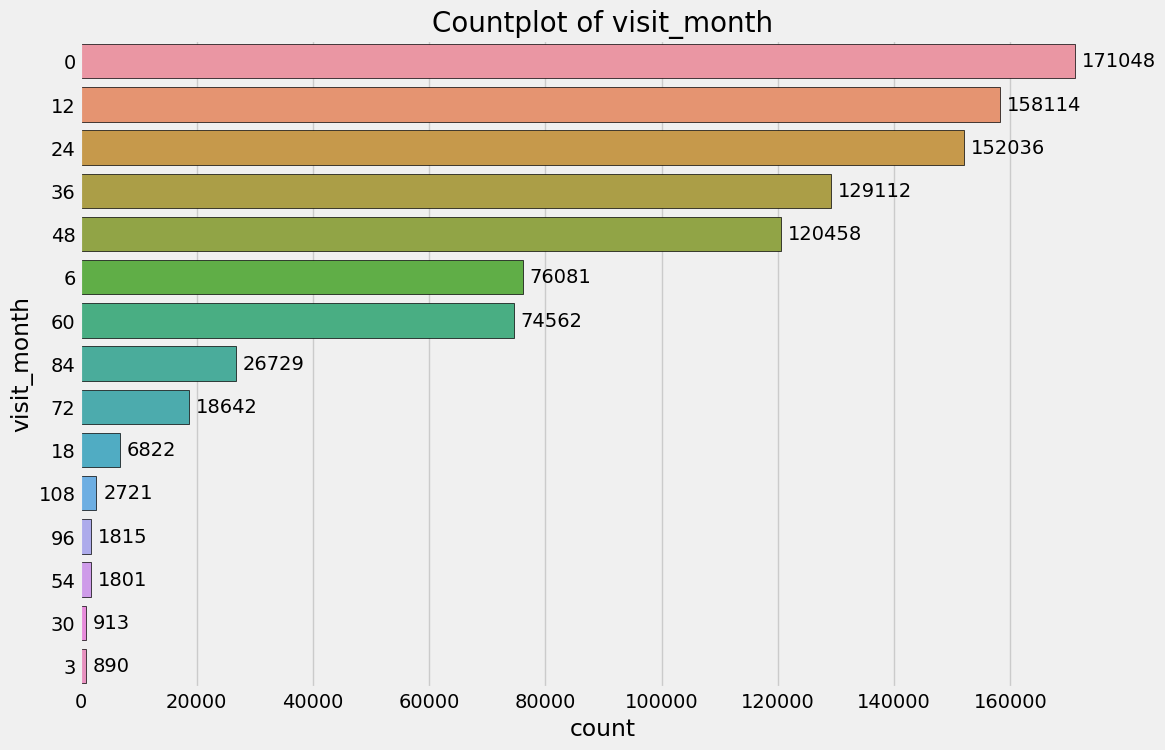

In [ ]:
# An overview of the data
fast_eda(merged_df, target=None, correlation=True, pairplot=True, hist_box_plot=True, countplot=True)

In [ ]:
#drop columns with null values --- updrs_4 and upd23b_clinical_state_on_medication columns
merged_df.drop(['updrs_4','upd23b_clinical_state_on_medication'],axis=1,inplace=True)

In [ ]:
merged_df

,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3
0,55_0,0,55,O00391,11254.3,NEQEQPLGQWHLS,11254.30,10.0,6.0,15.0
1,55_0,0,55,O00533,732430.0,GNPEPTFSWTK,102060.00,10.0,6.0,15.0
2,55_0,0,55,O00533,732430.0,IEIPSSVQQVPTIIK,174185.00,10.0,6.0,15.0
3,55_0,0,55,O00533,732430.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90,10.0,6.0,15.0
4,55_0,0,55,O00533,732430.0,SMEQNGPGLEYR,30838.70,10.0,6.0,15.0
...,...,...,...,...,...,...,...,...,...,...
941739,58648_108,108,58648,Q9UHG2,369437.0,ILAGSADSEGVAAPR,202820.00,6.0,0.0,0.0
941740,58648_108,108,58648,Q9UKV8,105830.0,SGNIPAGTTVDTK,105830.00,6.0,0.0,0.0
941741,58648_108,108,58648,Q9Y646,21257.6,LALLVDTVGPR,21257.60,6.0,0.0,0.0
941742,58648_108,108,58648,Q9Y6R7,17953.1,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26,6.0,0.0,0.0


import numpy as np
from google.colab import autoviz
df_7745469705361849242 = autoviz.get_df('df_7745469705361849242')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7745469705361849242, *['visit_month'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6433187845418866611 = autoviz.get_df('df_6433187845418866611')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6433187845418866611, *['patient_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6971097201935192017 = autoviz.get_df('df_6971097201935192017')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6971097201935192017, *['NPX'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8774723550763774145 = autoviz.get_df('df_8774723550763774145')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8774723550763774145, *['PeptideAbundance'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3069266128204831034 = autoviz.get_df('df_3069266128204831034')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3069266128204831034, *['visit_month'], **{})
chart

import numpy as np
from google.colab import autoviz
df_561828089236403413 = autoviz.get_df('df_561828089236403413')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_561828089236403413, *['patient_id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_102063562537054645 = autoviz.get_df('df_102063562537054645')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_102063562537054645, *['NPX'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3174422644824067599 = autoviz.get_df('df_3174422644824067599')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3174422644824067599, *['PeptideAbundance'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4011798239482587177 = autoviz.get_df('df_4011798239482587177')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4011798239482587177, *[[['visit_month', 'patient_id'], ['patient_id', 'NPX'], ['NPX', 'PeptideAbundance'], ['PeptideAbundance', 'updrs_1']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_8803520687017477475 = autoviz.get_df('df_8803520687017477475')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8803520687017477475, *['visit_month', 'patient_id', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_1567016919498997697 = autoviz.get_df('df_1567016919498997697')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1567016919498997697, *['visit_month', 'NPX', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_2740907715163224255 = autoviz.get_df('df_2740907715163224255')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2740907715163224255, *['visit_month', 'PeptideAbundance', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_1674264936503381124 = autoviz.get_df('df_1674264936503381124')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_1674264936503381124, *['visit_month', 'updrs_1', None], **{})
chart

In [ ]:
#drop null values on updrs_3
merged_df.dropna(inplace=True)
merged_df.isnull().sum()

In [ ]:
merged_df.to_csv('df_proc.csv', index=False)

In [ ]:
#Data Preprocessing
#1. Convert visit_month into time series data
#2. One hot encode peptide sequences into 'A',B'..............'Y'
#3. Frequency encoding of Peptide and UniProt
#4. Checking to see wheather there is any trend or seasonality component in the time series


In [ ]:
#select a chunk of the data
temp = merged_df.groupby('patient_id').cumcount() < 3000
df_temp = merged_df[temp]

In [ ]:
df_temp

In [ ]:
#One hot encoding for the peptide sequence
# peptide = 'ACDEFGHIKLMNPQRSTVWY'
# for i in peptide:
#     df_temp[i]=0

In [ ]:
# peptides = ['A',
#        'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R',
#        'S', 'T', 'V', 'W', 'Y']
# print(len(peptides))

20


In [ ]:
# Define a list for peptides
peptides = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

# Create a matrix of zeros with the same number of rows as the DataFrame and one column for each letter in the peptides list
matrix_df = np.zeros((len(df_temp), len(peptides)))

# Iterate over each row in the DataFrame
for i, row in enumerate(df_temp['Peptide']):
    # Iterate over each letter in the peptide sequence
    for j, k in enumerate(row):
        # If the letter appears in the peptides list, set the corresponding column in the matrix to 1
        if k in peptides:
            matrix_df[i, peptides.index(k)] = 1

# Convert the matrix to a DataFrame with column names from the peptides list and concatenate it with the original DataFrame
peptides_df = pd.DataFrame(matrix_df, columns=peptides)

In [ ]:
df_peptides = peptides_df.astype(int)

In [ ]:
df_peptides

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0,0,0,1,0,1,1,0,0,1,0,1,1,1,0,1,0,0,1,0
1,0,0,0,1,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0
2,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,1,1,0,0
3,1,1,0,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1
4,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697373,1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1,1,1,0,0
697374,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0
697375,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0
697376,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,1,0,0


In [ ]:
#join the two dataframes together
df = pd.concat([df_temp,df_peptides],axis=1)
df.dropna(inplace=True)
df

In [ ]:
#Frequency encoding of Peptides
freq_pep = df['Peptide'].value_counts(normalize=True)
df['pep_freq'] = df['Peptide'].map(freq_pep)

In [ ]:
df.columns

In [ ]:
df[['A',
       'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R',
       'S', 'T', 'V', 'W', 'Y']] = df[['A',
       'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R',
       'S', 'T', 'V', 'W', 'Y']].astype(int)

In [ ]:
#Frequency encoding of Uniprot
freq_uniprot = df['UniProt'].value_counts(normalize=True)
df['uniprot_freq'] = df['UniProt'].map(freq_uniprot)

In [ ]:
df

,visit_id,visit_month,patient_id,UniProt,NPX,Peptide,PeptideAbundance,updrs_1,updrs_2,updrs_3,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y,pep_freq,uniprot_freq
0,55_0,0.0,55.0,O00391,11254.3,NEQEQPLGQWHLS,11254.3,10.0,6.0,15.0,0,0,0,1,0,1,1,0,0,1,0,1,1,1,0,1,0,0,1,0,0.000845,0.000845
1,55_0,0.0,55.0,O00533,732430.0,GNPEPTFSWTK,102060.0,10.0,6.0,15.0,0,0,0,1,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0.001134,0.009107
2,55_0,0.0,55.0,O00533,732430.0,IEIPSSVQQVPTIIK,174185.0,10.0,6.0,15.0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,1,1,0,0,0.001142,0.009107
3,55_0,0.0,55.0,O00533,732430.0,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9,10.0,6.0,15.0,1,1,0,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,0.001161,0.009107
4,55_0,0.0,55.0,O00533,732430.0,SMEQNGPGLEYR,30838.7,10.0,6.0,15.0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0.001199,0.009107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696229,2660_48,48.0,2660.0,P02750,295651.0,DLLLPQPDLR,95127.4,6.0,0.0,0.0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0.001099,0.003334
696230,2660_48,48.0,2660.0,P02750,295651.0,VAAGAFQGLR,170088.0,6.0,0.0,0.0,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0.001150,0.003334
696231,2660_48,48.0,2660.0,P02750,295651.0,YLFLNGNK,30434.8,6.0,0.0,0.0,0,1,1,0,0,1,0,0,0,0,1,1,1,0,1,1,1,1,1,1,0.001086,0.003334
696232,2660_48,48.0,2660.0,P02751,1854730.0,FLATTPNSLLVSWQPPR,30890.7,6.0,0.0,0.0,1,1,1,1,0,1,0,1,0,0,1,0,1,1,1,1,1,1,0,0,0.001052,0.027957


In [ ]:
df.columns

In [ ]:
#final ransformed data
df_final = df[['NPX','updrs_1','PeptideAbundance', 'updrs_2', 'updrs_3', 'A',
       'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R',
       'S', 'T', 'V', 'W', 'Y' ,'pep_freq','uniprot_freq','patient_id']]

In [ ]:
df_final.head()

,NPX,updrs_1,PeptideAbundance,updrs_2,updrs_3,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y,pep_freq,uniprot_freq,patient_id
0,11254.3,10.0,11254.3,6.0,15.0,0,0,0,1,0,1,1,0,0,1,0,1,1,1,0,1,0,0,1,0,0.000845,0.000845,55.0
1,732430.0,10.0,102060.0,6.0,15.0,0,0,0,1,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0.001134,0.009107,55.0
2,732430.0,10.0,174185.0,6.0,15.0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,1,1,0,0,0.001142,0.009107,55.0
3,732430.0,10.0,27278.9,6.0,15.0,1,1,0,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,0.001161,0.009107,55.0
4,732430.0,10.0,30838.7,6.0,15.0,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0.001199,0.009107,55.0


In [ ]:
#N,E,Q,E,Q,P,L,G,Q,W,H,L,S - Peptide
#peptide is made of amino acids
#Each sequence is actually unique
#Frequency mapping as well as mapping each amino acid

In [ ]:
scaled_cols = ['NPX',
       'PeptideAbundance', 'updrs_1', 'updrs_2', 'updrs_3','uniprot_freq', 'pep_freq']

In [ ]:
df.dtypes

In [ ]:
#Scaling data
scaler = StandardScaler()
scaler.fit(df[[ 'NPX',
       'PeptideAbundance', 'updrs_1', 'updrs_2', 'updrs_3','uniprot_freq', 'pep_freq']])

In [ ]:
df_scaled = pd.DataFrame(scaler.transform(df[['NPX',
       'PeptideAbundance', 'updrs_1', 'updrs_2', 'updrs_3','uniprot_freq', 'pep_freq']]), columns=scaled_cols)

In [ ]:
df_scaled

,NPX,PeptideAbundance,updrs_1,updrs_2,updrs_3,uniprot_freq,pep_freq
0,-0.267717,-0.186497,0.717476,0.099997,-0.085043,-0.969430,-1.696324
1,-0.256298,-0.159692,0.717476,0.099997,-0.085043,-0.374300,0.694341
2,-0.256298,-0.138402,0.717476,0.099997,-0.085043,-0.374300,0.760382
3,-0.256298,-0.181766,0.717476,0.099997,-0.085043,-0.374300,0.918879
4,-0.256298,-0.180716,0.717476,0.099997,-0.085043,-0.374300,1.235873
...,...,...,...,...,...,...,...
628057,-0.263214,-0.161739,-0.050207,-0.967000,-1.157255,-0.790169,0.403763
628058,-0.263214,-0.139612,-0.050207,-0.967000,-1.157255,-0.790169,0.826422
628059,-0.263214,-0.180835,-0.050207,-0.967000,-1.157255,-0.790169,0.298098
628060,-0.238527,-0.180700,-0.050207,-0.967000,-1.157255,0.983524,0.020728


In [ ]:
# Add unscaled columns into a list
df2_cols = []
for i in df.columns:
    if i not in df_scaled.columns:
        df2_cols.append(i)

In [ ]:
df2 = df[df2_cols]
df_scaled = df_scaled.reset_index()
df2 = df2.reset_index()

In [ ]:
df_fin = pd.concat([df_scaled,df2],axis=1)

In [ ]:
df_fin

,level_0,index,NPX,PeptideAbundance,updrs_1,updrs_2,updrs_3,uniprot_freq,pep_freq,index,visit_id,visit_month,patient_id,UniProt,Peptide,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0,0,-0.267717,-0.186497,0.717476,0.099997,-0.085043,-0.969430,-1.696324,0,55_0,0.0,55.0,O00391,NEQEQPLGQWHLS,0,0,0,1,0,1,1,0,0,1,0,1,1,1,0,1,0,0,1,0
1,1,1,-0.256298,-0.159692,0.717476,0.099997,-0.085043,-0.374300,0.694341,1,55_0,0.0,55.0,O00533,GNPEPTFSWTK,0,0,0,1,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0
2,2,2,-0.256298,-0.138402,0.717476,0.099997,-0.085043,-0.374300,0.760382,2,55_0,0.0,55.0,O00533,IEIPSSVQQVPTIIK,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,1,1,0,0
3,3,3,-0.256298,-0.181766,0.717476,0.099997,-0.085043,-0.374300,0.918879,3,55_0,0.0,55.0,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,1,1,0,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1
4,4,4,-0.256298,-0.180716,0.717476,0.099997,-0.085043,-0.374300,1.235873,4,55_0,0.0,55.0,O00533,SMEQNGPGLEYR,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628057,628057,628057,-0.263214,-0.161739,-0.050207,-0.967000,-1.157255,-0.790169,0.403763,696229,2660_48,48.0,2660.0,P02750,DLLLPQPDLR,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1
628058,628058,628058,-0.263214,-0.139612,-0.050207,-0.967000,-1.157255,-0.790169,0.826422,696230,2660_48,48.0,2660.0,P02750,VAAGAFQGLR,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,1,0
628059,628059,628059,-0.263214,-0.180835,-0.050207,-0.967000,-1.157255,-0.790169,0.298098,696231,2660_48,48.0,2660.0,P02750,YLFLNGNK,0,1,1,0,0,1,0,0,0,0,1,1,1,0,1,1,1,1,1,1
628060,628060,628060,-0.238527,-0.180700,-0.050207,-0.967000,-1.157255,0.983524,0.020728,696232,2660_48,48.0,2660.0,P02751,FLATTPNSLLVSWQPPR,1,1,1,1,0,1,0,1,0,0,1,0,1,1,1,1,1,1,0,0


In [ ]:
df_fin.drop(['index','UniProt','visit_month','Peptide','patient_id', 'visit_id'], axis=1, inplace=True)

In [ ]:
df_fin

,level_0,NPX,PeptideAbundance,updrs_1,updrs_2,updrs_3,uniprot_freq,pep_freq,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,0,-0.267717,-0.186497,0.717476,0.099997,-0.085043,-0.969430,-1.696324,0,0,0,1,0,1,1,0,0,1,0,1,1,1,0,1,0,0,1,0
1,1,-0.256298,-0.159692,0.717476,0.099997,-0.085043,-0.374300,0.694341,0,0,0,1,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0
2,2,-0.256298,-0.138402,0.717476,0.099997,-0.085043,-0.374300,0.760382,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,1,1,1,0,0
3,3,-0.256298,-0.181766,0.717476,0.099997,-0.085043,-0.374300,0.918879,1,1,0,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1
4,4,-0.256298,-0.180716,0.717476,0.099997,-0.085043,-0.374300,1.235873,0,0,0,1,0,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628057,628057,-0.263214,-0.161739,-0.050207,-0.967000,-1.157255,-0.790169,0.403763,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1
628058,628058,-0.263214,-0.139612,-0.050207,-0.967000,-1.157255,-0.790169,0.826422,1,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,1,1,0
628059,628059,-0.263214,-0.180835,-0.050207,-0.967000,-1.157255,-0.790169,0.298098,0,1,1,0,0,1,0,0,0,0,1,1,1,0,1,1,1,1,1,1
628060,628060,-0.238527,-0.180700,-0.050207,-0.967000,-1.157255,0.983524,0.020728,1,1,1,1,0,1,0,1,0,0,1,0,1,1,1,1,1,1,0,0


In [ ]:
#save prepared data
df_fin.to_csv('df_fin.csv')

In [ ]:
#Designing our RNN
train_X = []
train_y = []
seq_length = 20
input_seq_length = seq_length
output_seq_length = 10

In [ ]:
def sliding_window(data, seq_length, input_seq_length, output_seq_length):
    X = []
    y_list = []
    for i in range(len(data) - seq_length - output_seq_length + 1):
        X.append(data[i:i+input_seq_length, :-3])
        y_i = []
        for j in range(output_seq_length):
            y_i.append(data[i+input_seq_length+j, -3:])
        y_list.append(y_i)
    y = np.concatenate(y_list, axis=0)
    return np.array(X), y

In [ ]:
input_cols = ['NPX', 'PeptideAbundance','uniprot_freq', 'pep_freq', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K',
       'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
output_cols = ['updrs_1', 'updrs_2', 'updrs_3']

In [ ]:
data = df_fin[input_cols + output_cols].values

In [ ]:
X, y = sliding_window(data, 10, 10, 3)

In [ ]:
print('Input sequence shape:', X.shape) # should be (number of samples, input sequence length, number of features)
print('Output sequence shape:', y.shape) # should be (number of samples, output sequence length, number of dependent variables)

Input sequence shape: (628050, 10, 24)
Output sequence shape: (1884150, 3)


In [ ]:
import numpy as np

# define sequence length
sequence_length = 50

# define input sequence length and output sequence length
input_seq_length = sequence_length
output_seq_length = 1

# get the number of features
num_features = len(df_fin.columns) - 3  # exclude the three y columns

# split the data into X and y
X = df_fin.iloc[:, :-3].values
y = df_fin[['updrs_1', 'updrs_2', 'updrs_3']].values

# initialize empty arrays for X and y sequences
X_seq = []
y_seq = []

# generate sequences
for i in range(len(X) - sequence_length):
    X_seq.append(X[i:i+sequence_length])
    y_seq.append(y[i+input_seq_length:i+input_seq_length+output_seq_length])

# convert to numpy arrays
X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# check the shapes
print(X_seq.shape)  # should be (len(X) - sequence_length, sequence_length, num_features)
print(y_seq.shape)  # should be (len(X) - sequence_length, output_seq_length)


In [ ]:
#A          B                c                 Y
#[10]      [23]             [56]              [90]
#[11]      [14]             [75]              [87]
#[15]      [12]             [45]              [90]

#A                    #b                     C                      Y
#[10,11,15]        [23,14,12]              [56,75,45]            [90,87,90]

In [ ]:
X_tensor = tf.convert_to_tensor(X_seq)
y_tensor = tf.convert_to_tensor(y_seq)

In [ ]:
print(X_tensor.shape)

In [ ]:
#Train test split
n1 = int(0.6*len(X_tensor))
X_train = X_tensor[:n1]

n2 = int(0.4*len(X_tensor))
X_val_test = X_tensor[-n2:, :]

In [ ]:
n3 = int(0.5*len(X_val_test))
X_val = X_val_test[:n3]

n4 = int(0.5*len(X_val_test))
X_test = X_tensor[-n4:, :]

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

In [ ]:
m1 = int(0.6*len(y_tensor))
y_train = y_tensor[:m1]

m2 = int(0.4*len(X_tensor))
y_val_test = y_tensor[-m2:, :]

In [ ]:
m3 = int(0.5*len(y_val_test))
y_val = y_val_test[:m3]

m4 = int(0.5*len(y_val_test))
y_test = y_val_test[-m4:, :]

In [ ]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

In [ ]:
input_dim = 24
output_dim = 3

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(50, input_dim), return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(16))
model.add(Dense(output_dim))

In [ ]:
model.compile(optimizer='SGD', loss='mse', metrics=['mse'])##goa

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
3868/3868 [==============================] - 518s 132ms/step - loss: 0.9484 - mse: 0.9484 - val_loss: 1.1514 - val_mse: 1.1510
Epoch 2/10
3868/3868 [==============================] - 453s 117ms/step - loss: 0.9482 - mse: 0.9482 - val_loss: 1.1475 - val_mse: 1.1472
Epoch 3/10
3868/3868 [==============================] - 441s 114ms/step - loss: 0.9482 - mse: 0.9482 - val_loss: 1.1512 - val_mse: 1.1509
Epoch 4/10
3868/3868 [==============================] - 429s 111ms/step - loss: 0.9481 - mse: 0.9481 - val_loss: 1.1514 - val_mse: 1.1511
Epoch 5/10
3868/3868 [==============================] - 426s 110ms/step - loss: 0.9482 - mse: 0.9481 - val_loss: 1.1434 - val_mse: 1.1430
Epoch 6/10
3868/3868 [==============================] - 474s 123ms/step - loss: 0.9481 - mse: 0.9481 - val_loss: 1.1514 - val_mse: 1.1511
Epoch 7/10
3868/3868 [==============================] - 491s 127ms/step - loss: 0.9481 - mse: 0.9481 - val_loss: 1.1499 - val_mse: 1.1495
Epoch 8/10
3868/3868 [============

In [ ]:
history.history['val_loss']

[1.1364622116088867,
 1.138143539428711,
 1.1394433975219727,
 1.1405729055404663,
 1.1446853876113892,
 1.1375408172607422,
 1.1422381401062012,
 1.1397165060043335,
 1.1380356550216675,
 1.1389352083206177]

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'mse')
# plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
# plt.ylim(0, None)